<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# DEPLOYMENT

**Welcome to deployment section! In this section of the course, we will go through the entire deployment process, starting as if you had to create a servicable model from scratch, then deploy it for others to use, either through API or a web form.**

# Data

For this example we use the very common data set: [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), which is about flowers. 

From Wikipedia:
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("../DATA/iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
X = iris.drop('species',axis=1)
y = iris['species']

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
# Lots of ways to one hot encode
# https://stackoverflow.com/questions/47573293/unable-to-transform-string-column-to-categorical-matrix-using-keras-and-sklearn
# https://stackoverflow.com/questions/35107559/one-hot-encoding-of-string-categorical-features

In [10]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
scaled_X_train = scaler.transform(X_train)

In [16]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(patience=10)

In [22]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/500
4/4 [==============================] - 0s 49ms/step - loss: 1.3026 - accuracy: 0.3417 - val_loss: 1.1862 - val_accuracy: 0.3333
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.2938 - accuracy: 0.3417 - val_loss: 1.1800 - val_accuracy: 0.3333
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2847 - accuracy: 0.3417 - val_loss: 1.1737 - val_accuracy: 0.3333
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2760 - accuracy: 0.3417 - val_loss: 1.1668 - val_accuracy: 0.3667
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2665 - accuracy: 0.3417 - val_loss: 1.1601 - val_accuracy: 0.4000
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2583 - accuracy: 0.3583 - val_loss: 1.1535 - val_accuracy: 0.4333
Epoch 7/500
4/4 [==============================] - ETA: 0s - loss: 1.2630 - accuracy: 0.34 - 0s 9ms/step - loss: 1.2491 - accuracy: 0.3667 - val_loss: 1.1470 - val_a

4/4 [==============================] - 0s 17ms/step - loss: 0.8770 - accuracy: 0.5333 - val_loss: 0.8892 - val_accuracy: 0.4667
Epoch 60/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8728 - accuracy: 0.5333 - val_loss: 0.8860 - val_accuracy: 0.5000
Epoch 61/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8685 - accuracy: 0.5417 - val_loss: 0.8830 - val_accuracy: 0.5333
Epoch 62/500
4/4 [==============================] - 0s 10ms/step - loss: 0.8642 - accuracy: 0.5750 - val_loss: 0.8798 - val_accuracy: 0.5333
Epoch 63/500
4/4 [==============================] - 0s 11ms/step - loss: 0.8598 - accuracy: 0.6000 - val_loss: 0.8764 - val_accuracy: 0.5333
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 0.8558 - accuracy: 0.6000 - val_loss: 0.8734 - val_accuracy: 0.5333
Epoch 65/500
4/4 [==============================] - 0s 9ms/step - loss: 0.8516 - accuracy: 0.6417 - val_loss: 0.8703 - val_accuracy: 0.5333
Epoch 66/500
4/4 [=========

Epoch 117/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.6833 - val_loss: 0.7187 - val_accuracy: 0.6000
Epoch 118/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.6833 - val_loss: 0.7162 - val_accuracy: 0.6000
Epoch 119/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6667 - accuracy: 0.6833 - val_loss: 0.7136 - val_accuracy: 0.6000
Epoch 120/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6640 - accuracy: 0.6833 - val_loss: 0.7109 - val_accuracy: 0.6000
Epoch 121/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6614 - accuracy: 0.6833 - val_loss: 0.7082 - val_accuracy: 0.6000
Epoch 122/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6586 - accuracy: 0.6833 - val_loss: 0.7056 - val_accuracy: 0.6000
Epoch 123/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6559 - accuracy: 0.6833 - val_loss: 0.7029 - val_accuracy: 0.6000
Epoch 124/500

Epoch 232/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4721 - accuracy: 0.7500 - val_loss: 0.5177 - val_accuracy: 0.7000
Epoch 233/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4711 - accuracy: 0.7500 - val_loss: 0.5162 - val_accuracy: 0.7000
Epoch 234/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4700 - accuracy: 0.7500 - val_loss: 0.5150 - val_accuracy: 0.7333
Epoch 235/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4690 - accuracy: 0.7500 - val_loss: 0.5138 - val_accuracy: 0.7333
Epoch 236/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4680 - accuracy: 0.7500 - val_loss: 0.5128 - val_accuracy: 0.7333
Epoch 237/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4671 - accuracy: 0.7500 - val_loss: 0.5114 - val_accuracy: 0.7333
Epoch 238/500
4/4 [==============================] - 0s 7ms/step - loss: 0.4660 - accuracy: 0.7500 - val_loss: 0.5106 - val_accuracy: 0.7333
Epoch 239/500

4/4 [==============================] - 0s 10ms/step - loss: 0.4196 - accuracy: 0.8333 - val_loss: 0.4596 - val_accuracy: 0.8000
Epoch 291/500
4/4 [==============================] - 0s 13ms/step - loss: 0.4188 - accuracy: 0.8333 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 292/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4180 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.8000
Epoch 293/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4171 - accuracy: 0.8417 - val_loss: 0.4572 - val_accuracy: 0.8000
Epoch 294/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4163 - accuracy: 0.8417 - val_loss: 0.4561 - val_accuracy: 0.8000
Epoch 295/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4157 - accuracy: 0.8417 - val_loss: 0.4547 - val_accuracy: 0.8000
Epoch 296/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4149 - accuracy: 0.8417 - val_loss: 0.4540 - val_accuracy: 0.8000
Epoch 297/500
4/4 [===

Epoch 348/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3756 - accuracy: 0.8917 - val_loss: 0.4097 - val_accuracy: 0.9000
Epoch 349/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3749 - accuracy: 0.8917 - val_loss: 0.4085 - val_accuracy: 0.9000
Epoch 350/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3741 - accuracy: 0.9000 - val_loss: 0.4077 - val_accuracy: 0.9000
Epoch 351/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3734 - accuracy: 0.9083 - val_loss: 0.4065 - val_accuracy: 0.9000
Epoch 352/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3726 - accuracy: 0.9083 - val_loss: 0.4057 - val_accuracy: 0.9000
Epoch 353/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3719 - accuracy: 0.9083 - val_loss: 0.4046 - val_accuracy: 0.9000
Epoch 354/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3713 - accuracy: 0.9083 - val_loss: 0.4036 - val_accuracy: 0.9000
Epoch 355/

Epoch 406/500
4/4 [==============================] - 0s 14ms/step - loss: 0.3355 - accuracy: 0.9167 - val_loss: 0.3632 - val_accuracy: 0.9333
Epoch 407/500
4/4 [==============================] - 0s 14ms/step - loss: 0.3348 - accuracy: 0.9167 - val_loss: 0.3621 - val_accuracy: 0.9333
Epoch 408/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3343 - accuracy: 0.9250 - val_loss: 0.3610 - val_accuracy: 0.9333
Epoch 409/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3334 - accuracy: 0.9250 - val_loss: 0.3604 - val_accuracy: 0.9333
Epoch 410/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3328 - accuracy: 0.9250 - val_loss: 0.3600 - val_accuracy: 0.9333
Epoch 411/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3321 - accuracy: 0.9167 - val_loss: 0.3595 - val_accuracy: 0.9333
Epoch 412/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3315 - accuracy: 0.9167 - val_loss: 0.3589 - val_accuracy: 0.9333
Epoch 

Epoch 464/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2986 - accuracy: 0.9250 - val_loss: 0.3216 - val_accuracy: 0.9667
Epoch 465/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2980 - accuracy: 0.9250 - val_loss: 0.3208 - val_accuracy: 0.9667
Epoch 466/500
4/4 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.93 - 0s 9ms/step - loss: 0.2973 - accuracy: 0.9250 - val_loss: 0.3201 - val_accuracy: 0.9667
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2970 - accuracy: 0.9250 - val_loss: 0.3198 - val_accuracy: 0.9667
Epoch 468/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2963 - accuracy: 0.9250 - val_loss: 0.3188 - val_accuracy: 0.9667
Epoch 469/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2956 - accuracy: 0.9333 - val_loss: 0.3181 - val_accuracy: 0.9667
Epoch 470/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2951 - accuracy: 0.9333 - val_los

## Model Evaluation

In [23]:
metrics = pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.302593,0.341667,1.186186,0.333333
1,1.293782,0.341667,1.179986,0.333333
2,1.284655,0.341667,1.173663,0.333333
3,1.276032,0.341667,1.166831,0.366667
4,1.266547,0.341667,1.160129,0.400000
...,...,...,...,...
495,0.279739,0.933333,0.300035,0.966667
496,0.279158,0.933333,0.299518,0.966667
497,0.278602,0.933333,0.298879,0.966667
498,0.278077,0.933333,0.298474,0.966667


<AxesSubplot:>

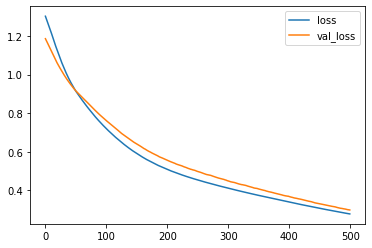

In [25]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

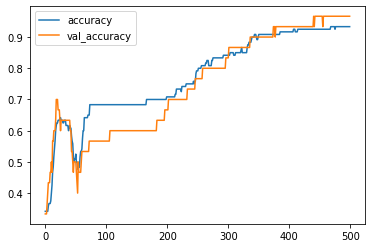

In [26]:
metrics[['accuracy','val_accuracy']].plot()

In [27]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.2980886399745941, 0.9666666388511658]

## Ready Model for Deployment

In [29]:
epochs = len(metrics)
epochs

500

In [30]:
scaled_X = scaler.fit_transform(X)

In [32]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 1.1200 - accuracy: 0.0733
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.0733
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 1.1164 - accuracy: 0.0800
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1148 - accuracy: 0.1800
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1133 - accuracy: 0.2533
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 1.1119 - accuracy: 0.4067
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1105 - accuracy: 0.4067
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1092 - accuracy: 0.4067
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 1.1079 - accuracy: 0.4067
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1067 - accuracy: 0.4200
Epoch 11/500
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.7945 - accuracy: 0.6667
Epoch 168/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.6867
Epoch 169/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.6800
Epoch 170/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7866 - accuracy: 0.6867
Epoch 171/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7840 - accuracy: 0.6867
Epoch 172/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7815 - accuracy: 0.6867
Epoch 173/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7789 - accuracy: 0.6867
Epoch 174/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7764 - accuracy: 0.6867
Epoch 175/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7739 - accuracy: 0.6867
Epoch 176/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7714 - accuracy: 0.6933
Epoch 177/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.9267
Epoch 332/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.9267
Epoch 333/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5392 - accuracy: 0.9333
Epoch 334/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.9333
Epoch 335/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.9333
Epoch 336/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5366 - accuracy: 0.9333
Epoch 337/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.9333
Epoch 338/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.9333
Epoch 339/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.9333
Epoch 340/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.9333
Epoch 341/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.9400
Epoch 496/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.9400
Epoch 497/500
5/5 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.93 - 0s 2ms/step - loss: 0.4153 - accuracy: 0.9400
Epoch 498/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.9400
Epoch 499/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.9400
Epoch 500/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.9400


In [34]:
model.save("final_iris_model.h5")

### Saving Scaler

In [35]:
import joblib

In [37]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [40]:
from tensorflow.keras.models import load_model

In [41]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [42]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [43]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [44]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [45]:
encoder.classes_

array([0, 1, 2])

In [53]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower))
    
    return classes[class_ind]
                    

In [54]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# CODE FOR DEPLOYMENT:

In [56]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = np.argmax(model.predict(flower))
    
    return classes[class_ind]

In [57]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}